In [21]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(14))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Train on 9576 samples, validate on 1065 samples
Epoch 1/20
9576/9576 [==============================] - 6s 606us/sample - loss: 3.3340 - acc: 0.0782 - val_loss: 2.5417 - val_acc: 0.1596
Epoch 2/20
9576/9576 [==============================] - 5s 566us/sample - loss: 2.5930 - acc: 0.1598 - val_loss: 2.2075 - val_acc: 0.2066
Epoch 3/20
9576/9576 [==============================] - 6s 576us/sample - loss: 2.0210 - acc: 0.3065 - val_loss: 1.5515 - val_acc: 0.5333
Epoch 4/20
9576/9576 [==============================] - 5s 567us/sample - loss: 1.5056 - acc: 0.4978 - val_loss: 1.1454 - val_acc: 0.6714
Epoch 5/20
9576/9576 [==============================] - 5s 565us/sample - loss: 1.2406 - acc: 0.6020 - val_loss: 1.0089 - val_acc: 0.6892
Epoch 6/20
9576/9576 [==============================] - 5s 564us/sample - loss: 1.0802 - acc: 0.6643 - val_loss: 0.8888 - val_acc: 0.7221
Epoch 7/20
9576/9576 [==============================] - 5s 565us/sample - loss: 0.9499 - acc: 0.7068 - val_loss: 0.7719 - va

Saved model to disk
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


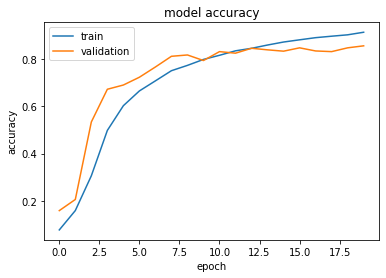

In [22]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


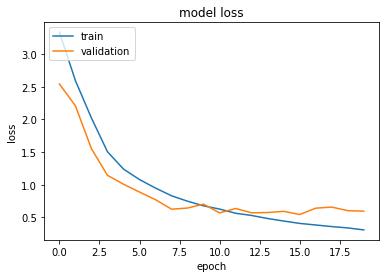

In [23]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_19 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)         

In [25]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)



# Evaluate on test data
3547/3547 [==============================] - 1s 149us/sample - loss: 0.5499 - acc: 0.8579
test loss, test acc: [0.5499010894847716, 0.85790807]
